In [2]:
import torch

In [3]:
torch.__version__

'1.5.1'

In [4]:
x = torch.Tensor(2,3)
x.size()

torch.Size([2, 3])

In [5]:
x

tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [1.0153e-08, 2.0943e+23, 1.0472e-11]])

In [6]:
x_gpu = x.cuda()

In [7]:
x_gpu

tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [1.0153e-08, 2.0943e+23, 1.0472e-11]], device='cuda:0')

In [10]:
import torch
import torch.nn as nn

In [60]:
data_num = 1000
epoch_num = 5000

x = torch.zeros([data_num, 1], dtype=torch.float32)
noise = torch.zeros([data_num, 1], dtype=torch.float32)

nn.init.uniform_(x, -15, 15)
nn.init.normal_(noise, std=10)

y = x**2 + 3
y_noise = y + noise

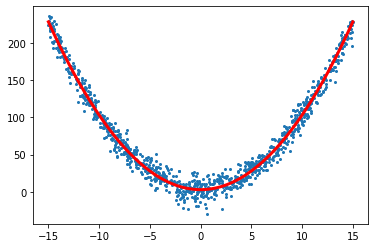

In [61]:
import matplotlib.pyplot as plt
import numpy as np

x_line = np.linspace(-15,15,100)
y_line = x_line ** 2 + 3

plt.scatter(x, y_noise, s=4)
plt.plot(x_line, y_line, color='red', linewidth=3)
plt.show()

In [99]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,15),
    nn.ReLU(),
    nn.Linear(15,6),
    nn.ReLU(),
    nn.Linear(6,1),
)
# cuda 12s, cpu 9s

In [100]:
'''
model = nn.Sequential(
    nn.Linear(1,60),
    nn.ReLU(),
    nn.Linear(60,150),
    nn.ReLU(),
    nn.Linear(150,60),
    nn.ReLU(),
    nn.Linear(60,1),
)
'''
# cuda 12s, cpu 20s

'\nmodel = nn.Sequential(\n    nn.Linear(1,60),\n    nn.ReLU(),\n    nn.Linear(60,150),\n    nn.ReLU(),\n    nn.Linear(150,60),\n    nn.ReLU(),\n    nn.Linear(60,1),\n)\n'

In [101]:
#model.to(torch.device("cuda"))
#x = x.cuda()
#y_noise = y_noise.cuda()
#cuda 12secs, cpu 6.9secs for simple
#cuda 12secs, cpu 20s for complicated
model.to(torch.device("cpu"))
x = x.cpu()
y_noise=y_noise.cpu()

In [102]:
import torch.optim as optim
opt = optim.SGD(model.parameters(), lr=0.0005)

In [104]:
import time
start = time.time()

loss_func = nn.L1Loss()


for epoch in range(epoch_num):
    opt.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y_noise)
    loss.backward()
    opt.step()
    
    if epoch % 500 == 0:
        print(loss)
        
print(f'elapsed time: {time.time()-start} secs.')

tensor(77.3250, grad_fn=<L1LossBackward>)
tensor(68.7448, grad_fn=<L1LossBackward>)
tensor(22.2045, grad_fn=<L1LossBackward>)
tensor(21.0713, grad_fn=<L1LossBackward>)
tensor(20.0013, grad_fn=<L1LossBackward>)
tensor(18.6698, grad_fn=<L1LossBackward>)
tensor(16.6248, grad_fn=<L1LossBackward>)
tensor(13.7279, grad_fn=<L1LossBackward>)
tensor(10.9084, grad_fn=<L1LossBackward>)
tensor(9.3081, grad_fn=<L1LossBackward>)
elapsed time: 7.140293836593628 secs.


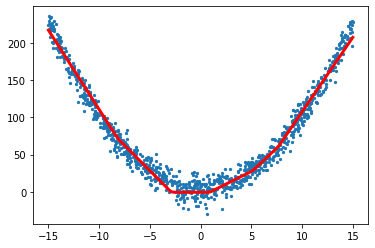

In [117]:
x_line = np.linspace(-15,15,100, dtype=np.float32).reshape(100,-1)
y_line = model(torch.from_numpy(x_line))

plt.scatter(x, y_noise, s=5)
plt.plot(x_line, y_line.detach().numpy(), linewidth=3, color='red')

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim



data_num = 1000
epoch_num = 5000

x = torch.zeros([data_num, 1], dtype=torch.float32)
noise = torch.zeros([data_num, 1], dtype=torch.float32)

nn.init.uniform_(x, -15, 15)
nn.init.normal_(noise, std=300)

y = x**3 - 4 * x**2 + 9 * x + 3
y_noise = y + noise

model = nn.Sequential(
    nn.Linear(1,60),
    nn.ReLU(),
    nn.Linear(60,150),
    nn.ReLU(),
    nn.Linear(150,60),
    nn.ReLU(),
    nn.Linear(60,1),
)
model.to(torch.device("cuda"))
x = x.cuda()
y_noise = y_noise.cuda()

opt = optim.SGD(model.parameters(), lr=0.0005)

import time
start = time.time()

loss_func = nn.L1Loss()

for epoch in range(epoch_num):
    opt.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y_noise)
    loss.backward()
    opt.step()
    
    if epoch % 500 == 0:
        print(loss)
        
print(f'elapsed time: {time.time()-start} secs.')

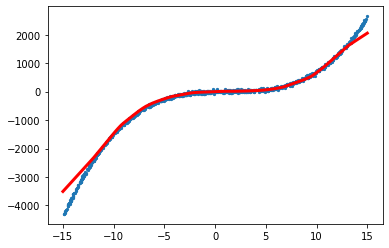

In [139]:
x_line = np.linspace(-15,15,100, dtype=np.float32).reshape(100,-1)
y_line = model(torch.from_numpy(x_line).cuda())
y_line = y_line.cpu()

plt.scatter(x.cpu(), y_noise.cpu(), s=5)
plt.plot(x_line, y_line.detach().numpy(), linewidth=3, color='red')